<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Copy_of_Final_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:-** More specifically, we are working with a Car Sale Adverts dataset provided by AutoTrader(one of the industry partners). The dataset contains an anonymised collection of adverts with information on vehicles such as brand, type, colour, mileage, as well as the selling price.  Need to
perform a structured set of tasks with the ultimate goal of learning about associations and group differences that have a significant effect on the valuation of vehicles.

Below steps are performed :-

1. **Exploratory Data Analysis**

2. **Data Preprocessing**

3. **Association and Group Differences**

4. **Model Implemetation**

# **Exploratory Data Analysis**

**Importing Standard Python Libraries**

In [32]:
import pandas as pd
# Pandas library used for data analysis and manipulation
import numpy as np #Numpy library used for Mathematical operations
#Seaborn and Matplotlib libraries are used for plotting
import seaborn as sns   
import matplotlib.pyplot as plt

**Loading and reading dataset using pandas library**

In [33]:
car_dataset = pd.read_csv('adverts.csv')


In [34]:
car_dataset.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [35]:
car_dataset.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [36]:
car_dataset.shape

(402005, 12)

In [37]:
car_dataset.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [38]:
car_dataset["crossover_car_and_van"] = car_dataset["crossover_car_and_van"].astype(int)

In [39]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  int64  
 11  fuel_type              401404 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.8+ MB


In [40]:
car_dataset.describe(include=[object])

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
count,370148,396627,402005,402005,402005,401168,401404
unique,72,22,110,1168,2,16,9
top,17,Black,BMW,Golf,USED,Hatchback,Petrol
freq,36738,86287,37376,11583,370756,167315,216929


**"crossover_car_and_van"** is a float value hence converted it in to integer

In [41]:
#car_dataset["crossover_car_and_van"] = car_dataset["crossover_car_and_van"].astype(int)

**"Public_reference"** column is not having relation with any of the columns. Hence we are dropping it.

In [42]:
car_dataset.drop("public_reference",axis=1,inplace=True)

In [43]:
car_dataset.describe() 

,mileage,year_of_registration,price,crossover_car_and_van
count,401878.000000,368694.000000,4.020050e+05,402005.000000
mean,37743.595656,2015.006206,1.734197e+04,0.004465
std,34831.724018,7.962667,4.643746e+04,0.066672
min,0.000000,999.000000,1.200000e+02,0.000000
25%,10481.000000,2013.000000,7.495000e+03,0.000000
50%,28629.500000,2016.000000,1.260000e+04,0.000000
75%,56875.750000,2018.000000,2.000000e+04,0.000000
max,999999.000000,2020.000000,9.999999e+06,1.000000


In [44]:
car_dataset.isnull().sum()

mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

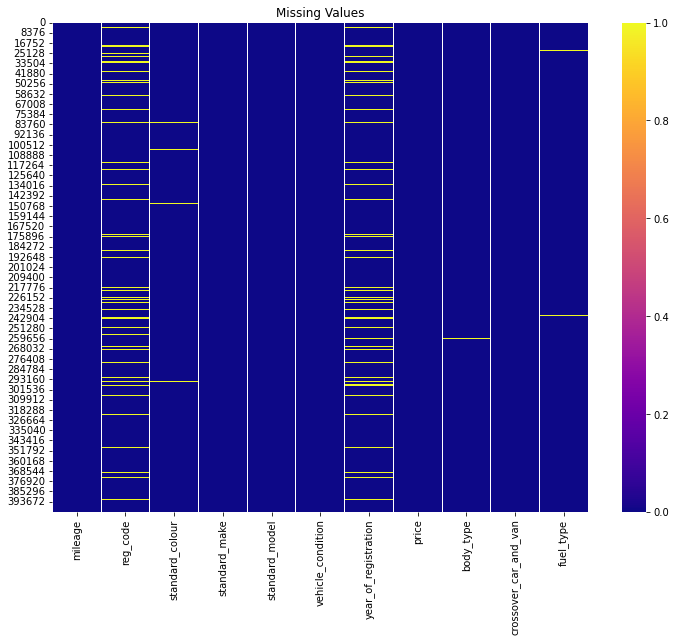

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9)) 
sns.heatmap(car_dataset.isna(), cmap='plasma')
plt.title("Missing Values") 
plt.show()

**Outliers**

*Explored the numerical data types found three* **attributes are effected by outliners** 

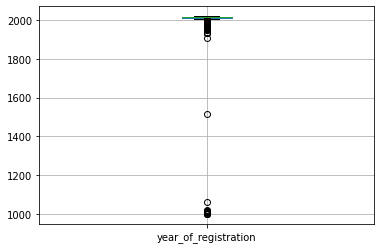

In [46]:
figure =car_dataset.boxplot('year_of_registration')

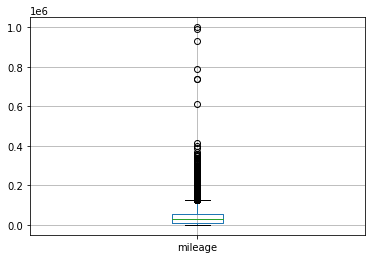

In [47]:
figure =car_dataset.boxplot('mileage')

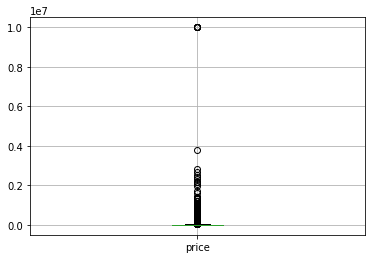

In [48]:
figure =car_dataset.boxplot('price')

**There were skewed values in the dataset**

In [49]:
car_dataset.skew()

<ipython-input-49-0629bea908e9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_dataset.skew()


mileage                    1.451132
year_of_registration     -87.909954
price                    154.681527
crossover_car_and_van     14.864870
dtype: float64

# **Data Pre-Processing**

**Handling Missing Vales**

In [60]:
car_dataset = pd.DataFrame(car_dataset)
# using dropna() function 
car_dataset = car_dataset.dropna()

In [61]:
car_dataset.isnull().sum()

mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
X=car_dataset.drop(columns='price')
ohe=OneHotEncoder()
ohe.fit(X[['reg_code','standard_colour', 'standard_make','standard_model', 'vehicle_condition','body_type','fuel_type']])
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['reg_code','standard_colour', 'standard_make','standard_model', 'vehicle_condition','body_type','fuel_type']),
                                    remainder='passthrough')

**1. Handling Outliers**

In [65]:
def hapus_outliers(data, x):
    Q1 = data[x].quantile(0.30)
    Q3 = data[x].quantile(0.70)
    IQR = Q3 - Q1
    data = data[~((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR)))]
    return data

In [66]:
car_dataset = hapus_outliers(car_dataset, 'price')
car_dataset = hapus_outliers (car_dataset,'year_of_registration')
car_dataset = hapus_outliers(car_dataset, 'mileage')

In [67]:
car_dataset.dtypes

mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van      int64
fuel_type                 object
dtype: object

In [68]:
car_dataset.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')

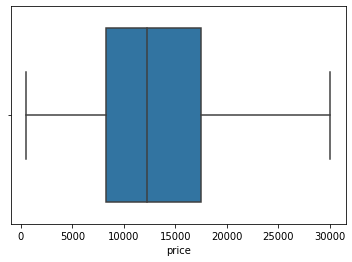

In [69]:
import seaborn as sns
sns.boxplot(x=car_dataset['price'])

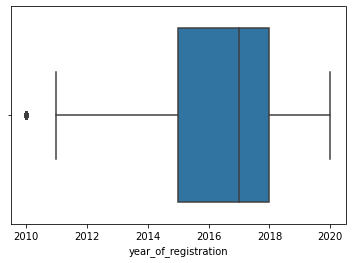

In [70]:
import seaborn as sns
sns.boxplot(x=car_dataset['year_of_registration'])

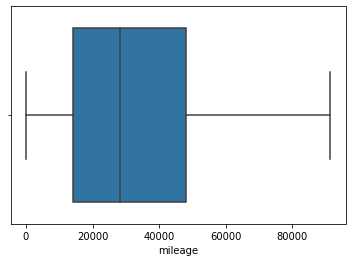

In [71]:
import seaborn as sns
sns.boxplot(x=car_dataset['mileage'])

**Outliers are treated and now exploreing the rest things**

**2. Dealing Missing Values**

After outliers are treated the count of missing values are reduced. Further will handle the missing values.

As from the above EDA we came to know that there are missing values present in the dataset.


Below are the columns which are having missing values.

**mileage        -           32**

**reg_code        -          113**

**standard_colour  -         738**

**year_of_registration  -    707**

**body_type             -    212**

**fuel_type             -      56**


out of 6 attributes 3 are of Numerical and 3 are of categorical features.

The most common and best for handling missing values in categorical attributes is Replacing With **Mode** imputatition. it is the most frequently occurring value and used in the case of **categorical feature**.

**Handling Missing Value with "Mode" Imputation**

In [ ]:
car_dataset['body_type'] = car_dataset['body_type'].fillna(car_dataset['body_type'].mode()[0])
car_dataset['fuel_type'] = car_dataset['fuel_type'].fillna(car_dataset['fuel_type'].mode()[0])
car_dataset['standard_colour'] = car_dataset['standard_colour'].fillna(car_dataset['standard_colour'].mode()[0])
car_dataset['reg_code'] = car_dataset['reg_code'].fillna(car_dataset['reg_code'].mode()[0])

Columns which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values. **As "mileage" attribute is having contionous values, median impution method is the best for replacing the missing values.**

As '**Mileage**' and '**Year of registration**' are numerical attributes we are implementing **mean** and **median** imputation methods. 

In [ ]:
car_dataset['mileage'] = car_dataset['mileage'].fillna(car_dataset['mileage'].mean(0))


In [ ]:
car_dataset['year_of_registration'] = car_dataset['year_of_registration'].fillna(car_dataset['year_of_registration'].median(0))

**Handling Missing Value with Median Imputation**

**This function will fill the missing value with any random value from that column**

In [97]:
car_dataset.isnull().sum()

mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

**As of now there were no missing values present in the system.**

In [ ]:
car_dataset.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')

In [98]:
car_dataset.dtypes

mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van      int64
fuel_type                 object
dtype: object

In [72]:
car_dataset['year_of_registration'] = car_dataset['year_of_registration'].astype(int)   
car_dataset['mileage'] = car_dataset['mileage'].astype(int)   

In [73]:
car_dataset.dtypes

mileage                   int64
reg_code                 object
standard_colour          object
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                object
crossover_car_and_van     int64
fuel_type                object
dtype: object

**Skewed Data**

In [74]:
car_dataset.skew(axis = 0)

<ipython-input-74-30ecc9cf7310>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_dataset.skew(axis = 0)


mileage                   0.633675
year_of_registration     -0.621443
price                     0.597250
crossover_car_and_van    18.746386
dtype: float64

**No action is required in terms of Skewed Data**

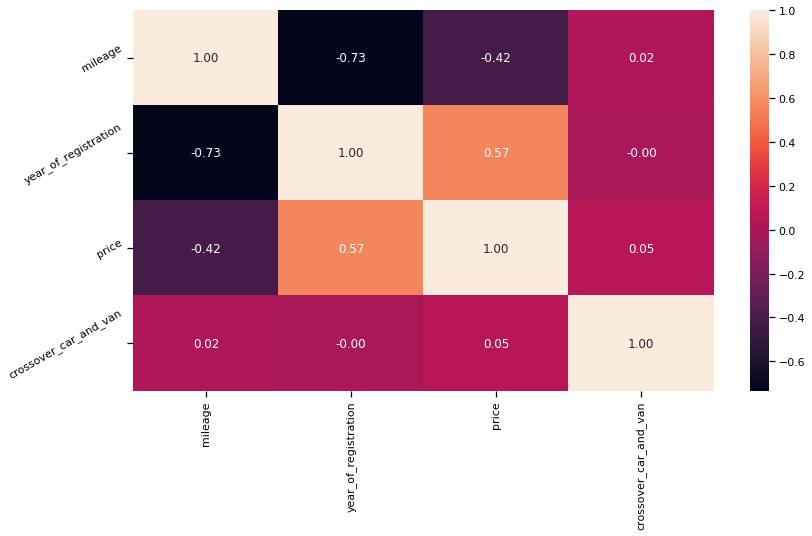

In [75]:
corr = car_dataset.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [104]:
car_dataset.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')

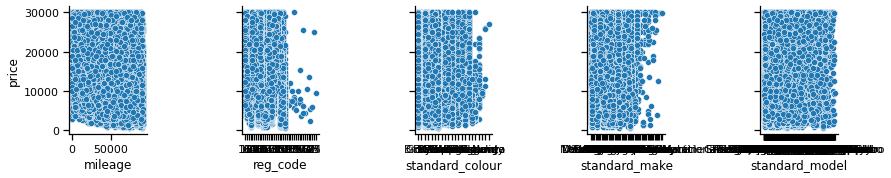

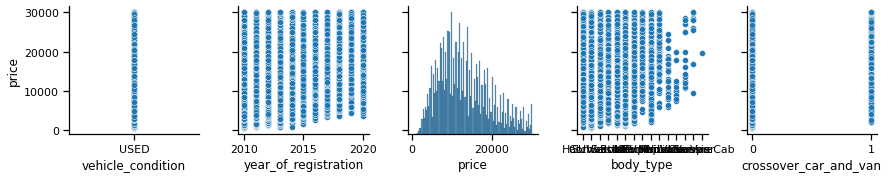

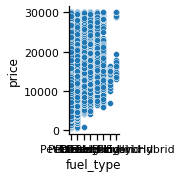

In [109]:
for i in range(0, len(car_dataset.columns),5):
    sns.pairplot(car_dataset, y_vars ='price', x_vars = car_dataset.columns[i:i+5]  )

# **Association and Group Differences Analysis**

**Its not easy to understand the relationship between variables using the pairplot so we can check with the help of scatterplot.**

**Univariate Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


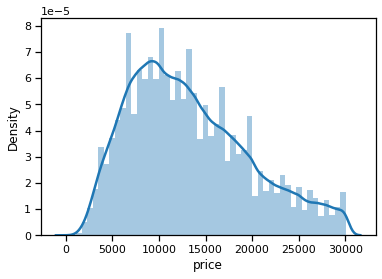

In [76]:
sns.distplot(car_dataset['price'])

**Fuel_type (vs) Price**

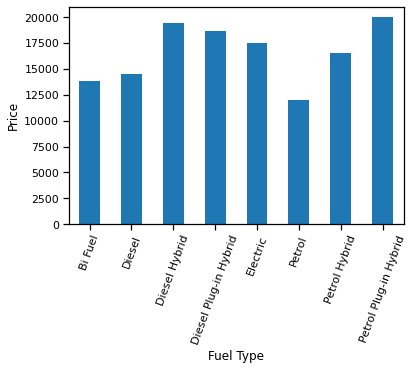

In [77]:
from matplotlib.pyplot import xticks
df_fuel_avg_price = car_dataset[['fuel_type','price']].groupby("fuel_type", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fuel_type', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Price")
xticks(rotation = 70)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


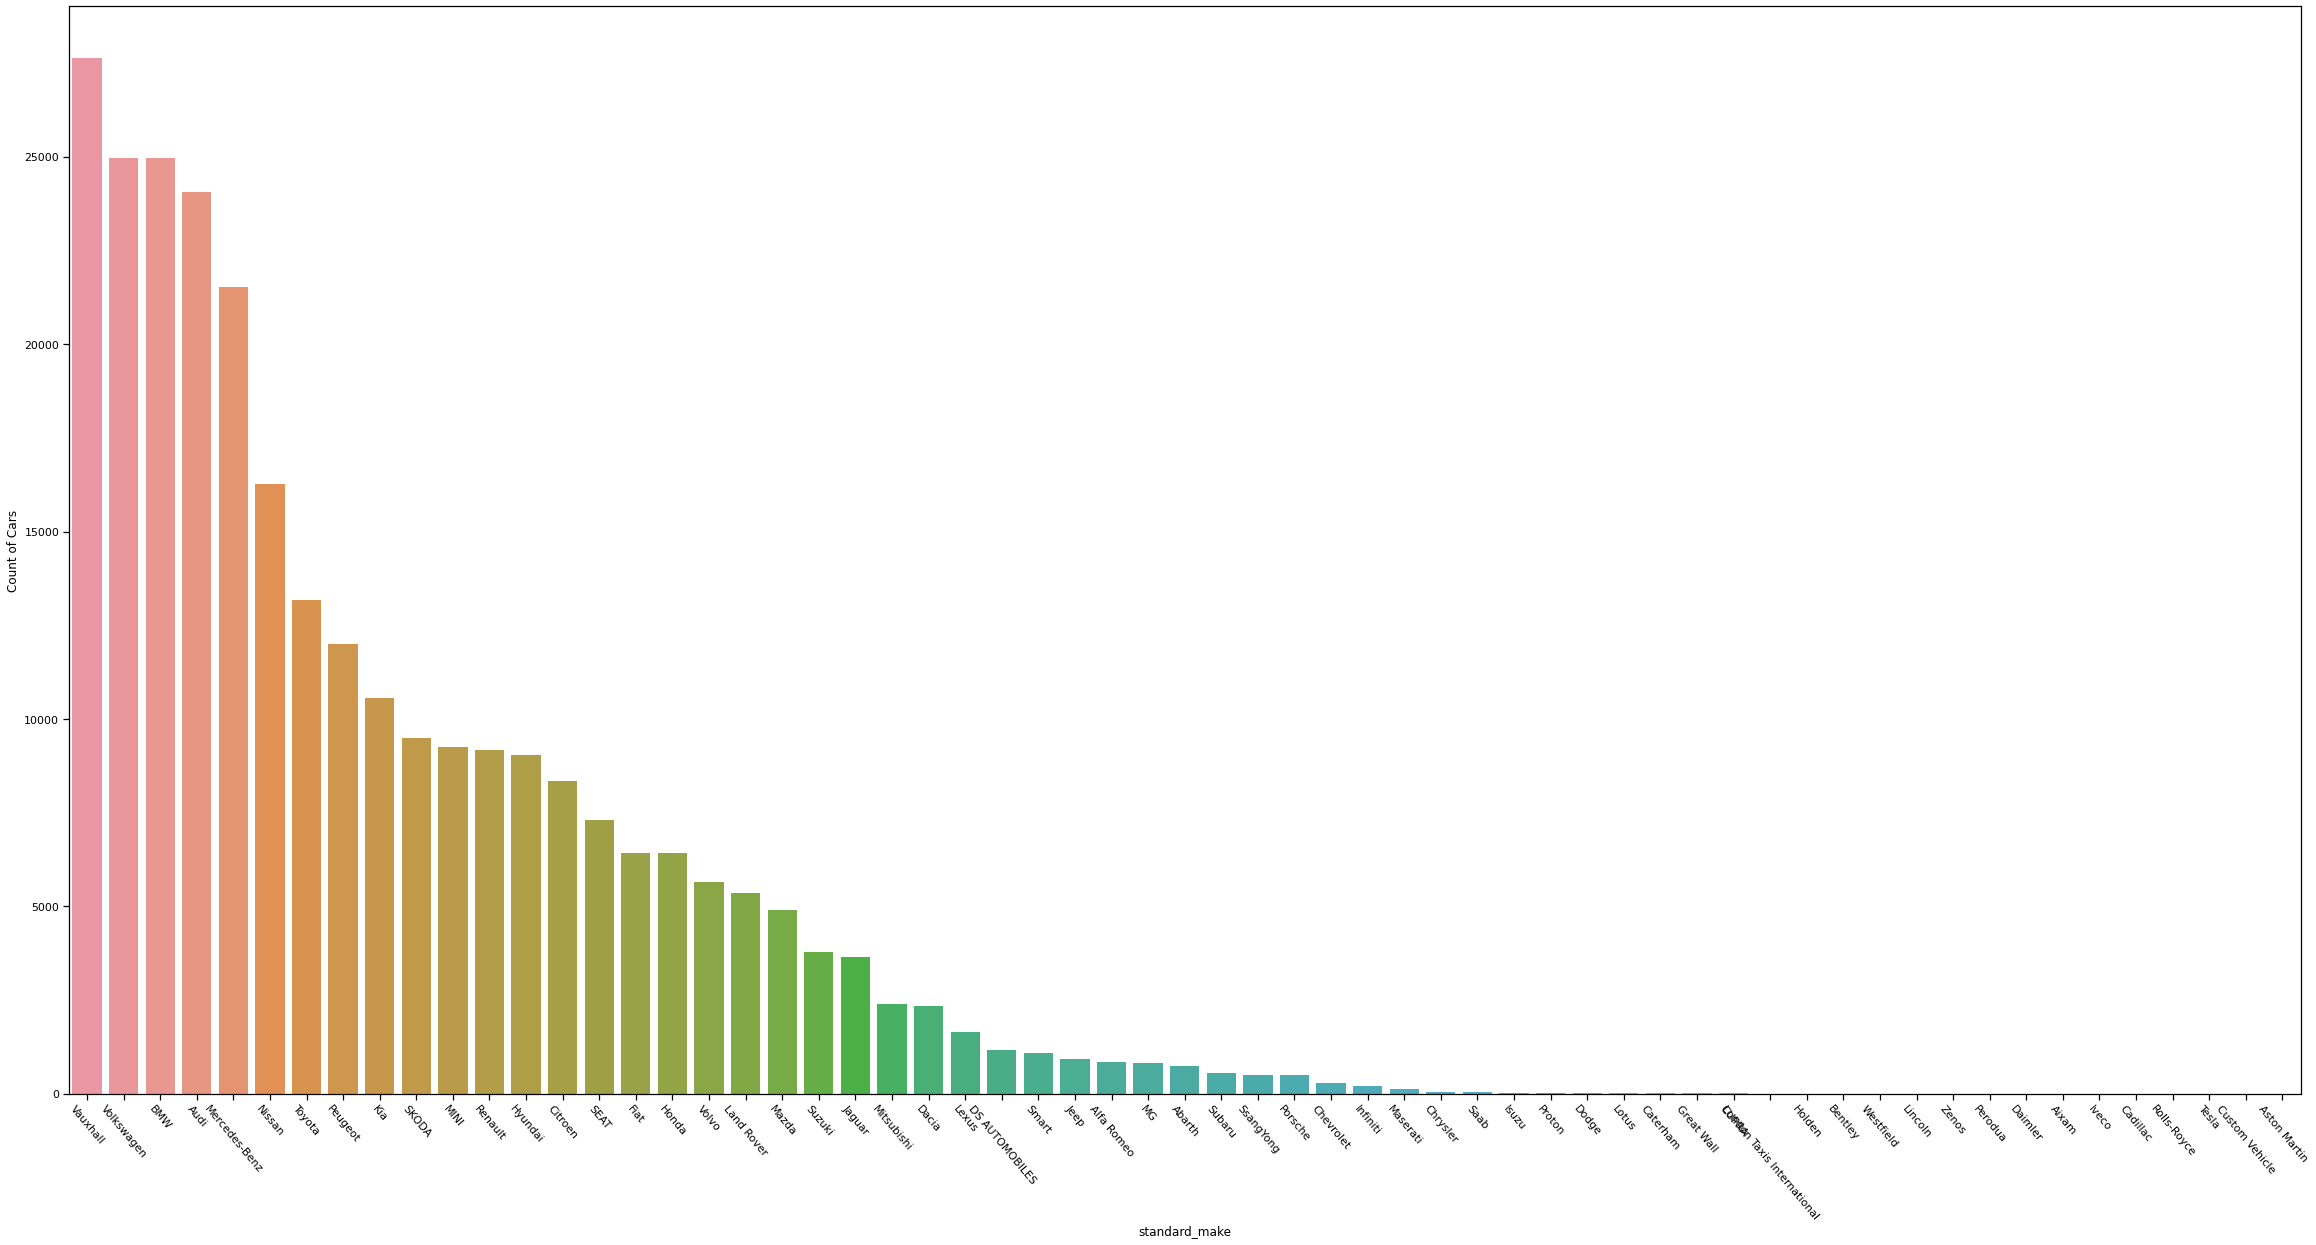

<Figure size 432x288 with 0 Axes>

In [78]:
fig, ax = plt.subplots(figsize = (40,20))
plt1 = sns.countplot(car_dataset['standard_make'], order=pd.value_counts(car_dataset['standard_make']).index,)
plt1.set(xlabel = 'standard_make', ylabel= 'Count of Cars')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

In [79]:
car_dataset.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2,7800,17,Grey,SKODA,Yeti,USED,2017,14000,SUV,0,Petrol
3,45000,16,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,0,Diesel
4,64000,64,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,0,Diesel
5,16000,17,Blue,Audi,S5,USED,2017,29000,Convertible,0,Petrol
6,24075,17,Red,Vauxhall,Viva,USED,2017,5861,Hatchback,0,Petrol


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


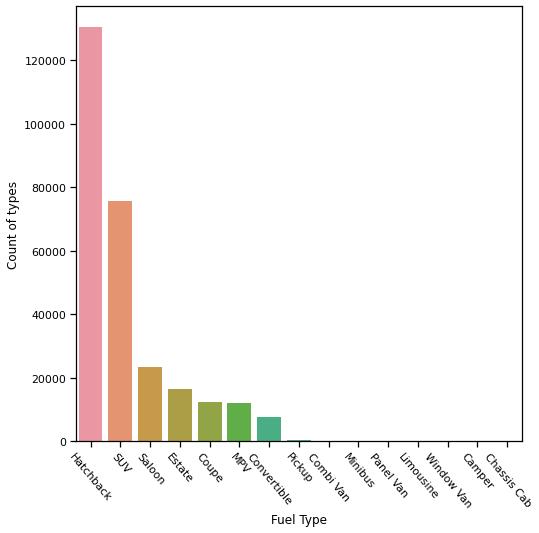

<Figure size 432x288 with 0 Axes>

In [80]:
fig, ax = plt.subplots(figsize = (8,8))
plt1 = sns.countplot(car_dataset['body_type'], order=pd.value_counts(car_dataset['body_type']).index,)
plt1.set(xlabel = 'Fuel Type', ylabel= 'Count of types')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


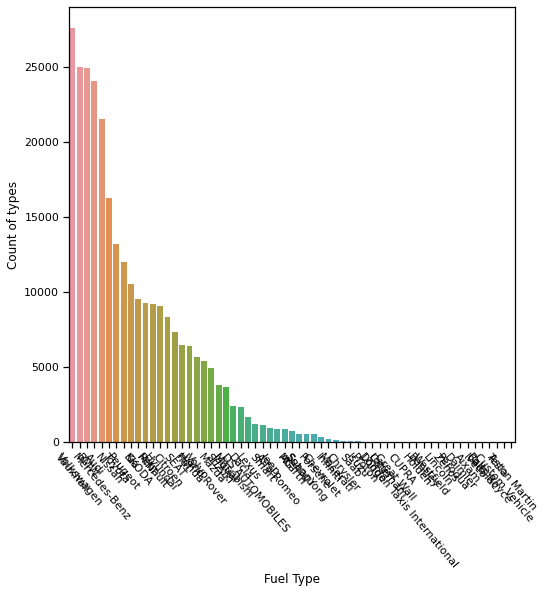

<Figure size 432x288 with 0 Axes>

In [81]:
fig, ax = plt.subplots(figsize = (8,8))
plt1 = sns.countplot(car_dataset['standard_make'], order=pd.value_counts(car_dataset['standard_make']).index,)
plt1.set(xlabel = 'Fuel Type', ylabel= 'Count of types')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


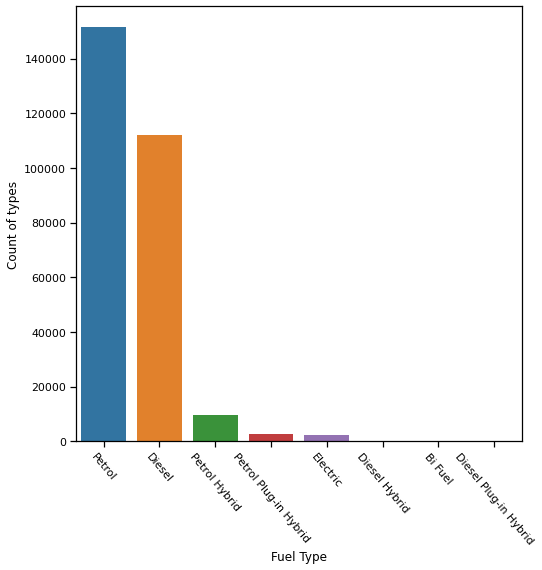

<Figure size 432x288 with 0 Axes>

In [82]:
fig, ax = plt.subplots(figsize = (8,8))
plt1 = sns.countplot(car_dataset['fuel_type'], order=pd.value_counts(car_dataset['fuel_type']).index,)
plt1.set(xlabel = 'Fuel Type', ylabel= 'Count of types')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

In [83]:
car_dataset.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


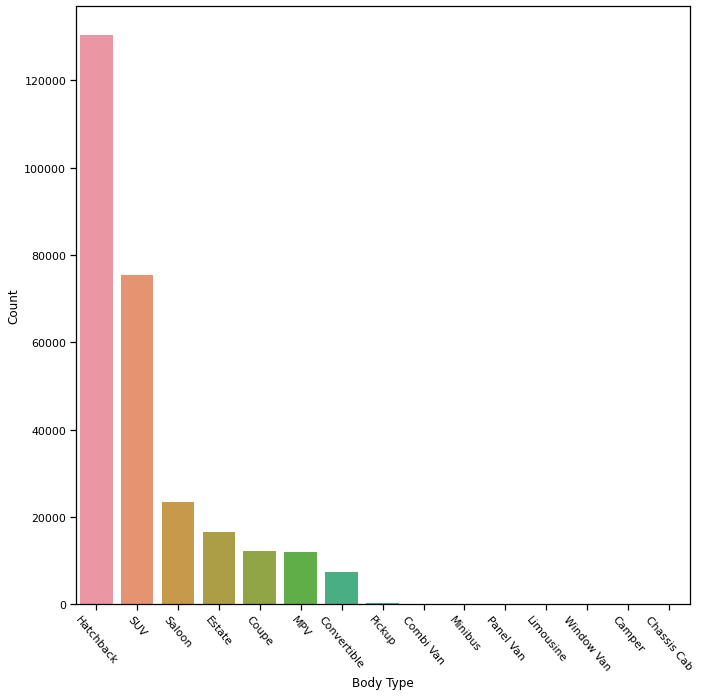

<Figure size 432x288 with 0 Axes>

In [84]:
fig, ax = plt.subplots(figsize = (11,11))
plt1 = sns.countplot(car_dataset['body_type'], order=pd.value_counts(car_dataset['body_type']).index,)
plt1.set(xlabel = 'Body Type', ylabel= 'Count')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

In [85]:
car_dataset["crossover_car_and_van"] = car_dataset["crossover_car_and_van"].astype(str)

In [86]:
car_dataset["mileage"] = car_dataset["mileage"].astype(int)
car_dataset["year_of_registration"] = car_dataset["year_of_registration"].astype(int)

In [87]:
car_dataset.dtypes

mileage                   int64
reg_code                 object
standard_colour          object
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                object
crossover_car_and_van    object
fuel_type                object
dtype: object

**On the clean data using Klib python library have created a group categorical visuals**

In [88]:
df = pd.DataFrame(car_dataset)

In [89]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 7.2 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


GridSpec(6, 8)

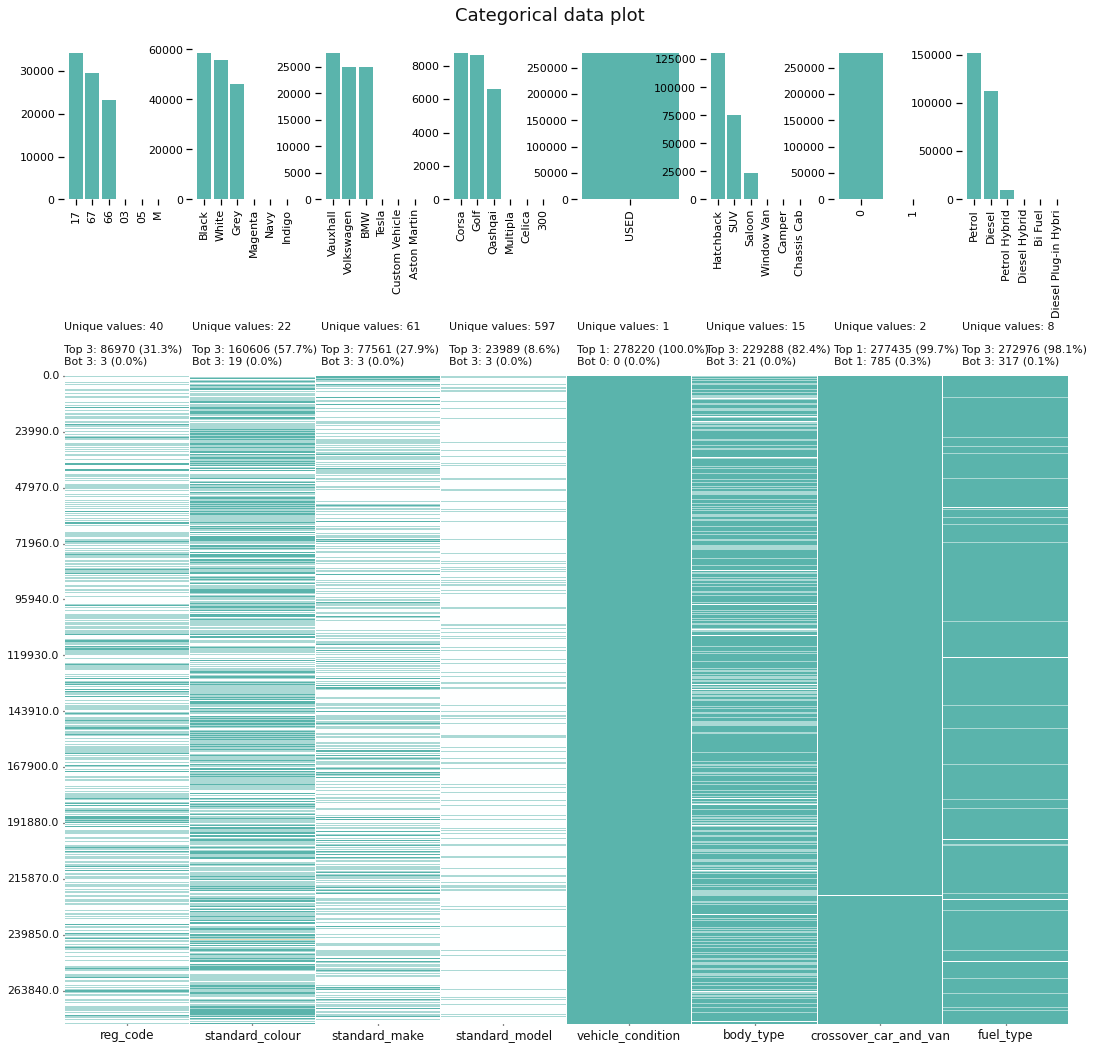

In [90]:
import klib
klib.cat_plot(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


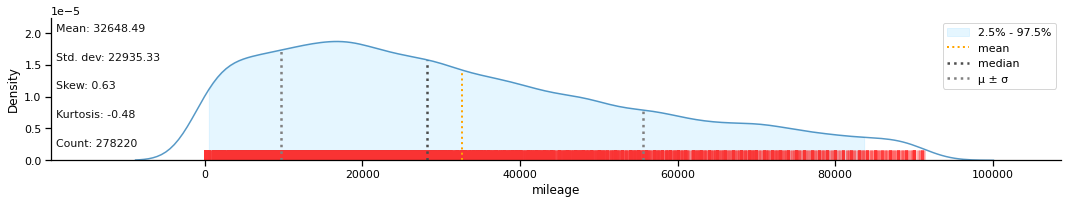

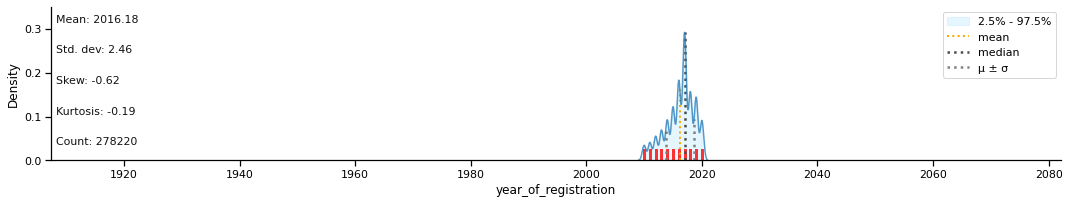

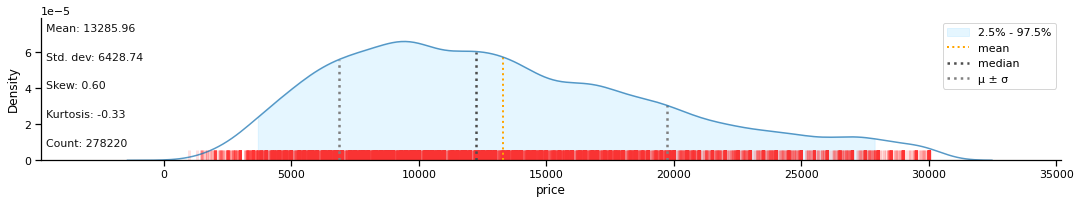

In [91]:
klib.dist_plot(df)

# **Model Implementation**

In [92]:
X=car_dataset.drop(columns='price')
y=car_dataset['price']

In [93]:
X

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
2,7800,17,Grey,SKODA,Yeti,USED,2017,SUV,0,Petrol
3,45000,16,Brown,Vauxhall,Mokka,USED,2016,Hatchback,0,Diesel
4,64000,64,Grey,Land Rover,Range Rover Sport,USED,2015,SUV,0,Diesel
5,16000,17,Blue,Audi,S5,USED,2017,Convertible,0,Petrol
6,24075,17,Red,Vauxhall,Viva,USED,2017,Hatchback,0,Petrol
...,...,...,...,...,...,...,...,...,...,...
401997,4075,69,Grey,Nissan,Juke,USED,2019,SUV,0,Petrol
402000,5179,69,Grey,Peugeot,208,USED,2019,Hatchback,0,Petrol
402002,52760,62,White,Nissan,Qashqai,USED,2012,SUV,0,Petrol
402003,10250,65,Red,Abarth,595,USED,2015,Hatchback,0,Petrol


In [94]:
y

2         14000
3          7995
4         26995
5         29000
6          5861
          ...  
401997    18000
402000    10595
402002     7250
402003    11490
402004    20520
Name: price, Length: 278220, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [96]:
ohe=OneHotEncoder()
ohe.fit(X[['reg_code','standard_colour', 'standard_make','standard_model', 'vehicle_condition','body_type','fuel_type']])

OneHotEncoder()

In [97]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['reg_code','standard_colour', 'standard_make','standard_model', 'vehicle_condition','body_type','fuel_type']),
                                    remainder='passthrough')

In [98]:
lr=LinearRegression()

In [99]:
car_dataset.dtypes

mileage                   int64
reg_code                 object
standard_colour          object
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                object
crossover_car_and_van    object
fuel_type                object
dtype: object

In [100]:
pipe=make_pipeline(column_trans,lr)

In [101]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '55', '56', '57',
       '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', 'G', 'M', 'P', 'S', 'Y'], dtype=objec...
       'Estate', 'Hatchback', 'Limousine', 'MPV', 'Minibus', 'Panel Van',
       'Pickup', 'SUV', 'Saloon', 'Window Van'], dtype=object),
                                                                            array(['Bi Fuel', 'Diesel', 'Diesel Hybrid', 'Diesel Plug-in Hybrid',
       'Electric', 'Petrol', 'Petrol Hybrid', 'Petrol Plug-in Hybrid'],
      dtype=object)]),
                                                  ['reg_code',
                                      

In [102]:
y_pred=pipe.predict(X_test)

In [103]:
r2_score(y_test,y_pred)

0.8770199558928773